In [135]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
from sklearn.cluster import KMeans


In [137]:
df = pd.read_csv('data.csv')

In [138]:
#first take out every country which has more than 80% nan values in cases,deaths and daily cases
percentages = df.groupby('Entity')['Daily tests','Cases','Deaths'].apply(lambda x: 100*x.isna().sum()/(x.isna().sum()+x.count()))
percentages = percentages[(percentages['Deaths']>80)|(percentages['Daily tests']>80)|(percentages['Cases']>80)].index.tolist()

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_9996/3245154043.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  percentages = df.groupby('Entity')['Daily tests','Cases','Deaths'].apply(lambda x: 100*x.isna().sum()/(x.isna().sum()+x.count()))


In [139]:
#remove countries with insufficient data
df_filt = df[~df['Entity'].isin(percentages)] 

In [140]:
df_filt['Deaths'] = df_filt.groupby('Entity')['Deaths'].diff()

C:\Users\KYRIAK~1\AppData\Local\Temp/ipykernel_9996/954635239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['Deaths'] = df_filt.groupby('Entity')['Deaths'].diff()


In [141]:
#drop all rows whith nan values
df1 = df_filt.dropna()

In [142]:
#fill rows with ffill metod
df2 = df_filt.fillna(method='ffill')

In [143]:
print(df_filt.shape)
print(df1.shape)
print(df2.shape)

(35182, 15)
(28402, 15)
(35182, 15)


In [144]:
groupCountry1 = df1.groupby('Entity')

In [145]:
stats1 = groupCountry1.mean()

In [146]:
print(stats1['Cases'])

Entity
Albania           2.284851e+04
Argentina         6.982294e+05
Australia         1.727569e+04
Austria           1.348925e+05
Bahrain           5.718402e+04
                      ...     
United Kingdom    1.124149e+06
United States     8.572490e+06
Uruguay           8.043554e+03
Zambia            1.720031e+04
Zimbabwe          1.032780e+04
Name: Cases, Length: 95, dtype: float64


In [147]:
stats1['Deaths per Cases'] = stats1['Deaths'] / stats1['Cases']

In [148]:
stats1['Tests per population'] = stats1['Daily tests']/stats1['Population']

In [149]:
print(stats1['Deaths per Cases'])

Entity
Albania           0.000215
Argentina         0.000210
Australia         0.000167
Austria           0.000187
Bahrain           0.000021
                    ...   
United Kingdom    0.000322
United States     0.000163
Uruguay           0.000216
Zambia            0.000199
Zimbabwe          0.000487
Name: Deaths per Cases, Length: 95, dtype: float64


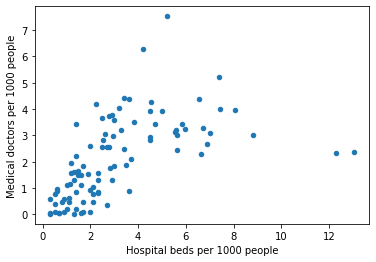

In [150]:
#Below we use some metrics before clustering
stats1.plot.scatter(x ='Hospital beds per 1000 people',y ='Medical doctors per 1000 people')
plt.show()

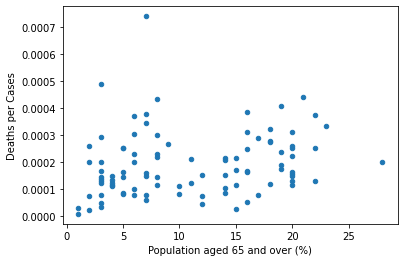

In [151]:
stats1.plot.scatter(x ='Population aged 65 and over (%)',y ='Deaths per Cases')
plt.show()

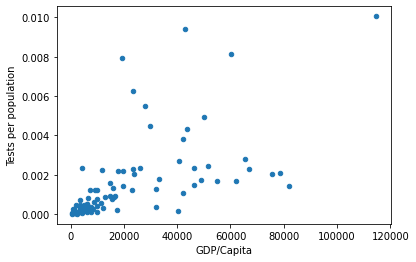

In [152]:
stats1.plot.scatter(x ='GDP/Capita',y ='Tests per population')
plt.show()

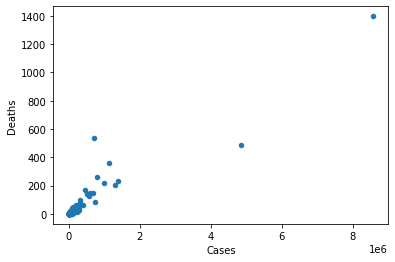

In [153]:
stats1.plot.scatter(x ='Cases',y ='Deaths')
plt.show()

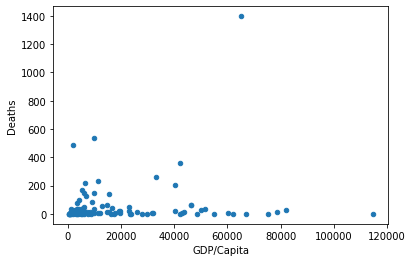

In [154]:
stats1.plot.scatter(x ='GDP/Capita',y ='Deaths')
plt.show()

In [155]:
def elbowPlot(col1,col2):
    data = np.column_stack((col1, col2))

    k_values = range(2, 10)

    sse_values = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        sse = kmeans.inertia_
        sse_values.append(sse)

    # Plot the SSE values against different K values
    plt.plot(k_values, sse_values, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Distances (SSE)')
    plt.title('Elbow Diagram')
    plt.show()

In [156]:
def cluster(df,col1,col2,k):
    
    # Build the K-means clustering model
    kmeans = KMeans(n_clusters=k)
    data = np.column_stack((col1, col2))
    # Train the model
    kmeans.fit(data)

    # Get the cluster assignments for each data point
    clusters = kmeans.labels_
    df['cluster'] = clusters
    print(df['cluster'])
    # Get the cluster centers
    centers = kmeans.cluster_centers_

    # Plot the data points colored by their cluster assignments
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
    plt.title('K-means Clustering')
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)
    plt.show()

C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

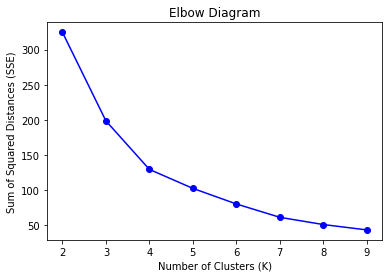

In [157]:
col1 = stats1['Hospital beds per 1000 people']
col2 = stats1['Medical doctors per 1000 people']
elbowPlot(col1,col2)

C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Entity
Albania           0
Argentina         3
Australia         2
Austria           3
Bahrain           0
                 ..
United Kingdom    2
United States     2
Uruguay           2
Zambia            0
Zimbabwe          0
Name: cluster, Length: 95, dtype: int32


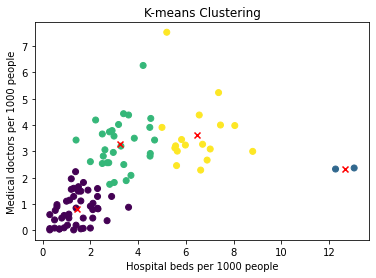

In [158]:
cluster(stats1,col1,col2,4)


C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

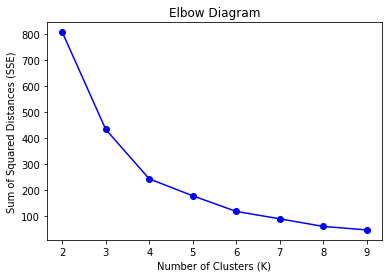

In [159]:
col1 = stats1['Population aged 65 and over (%)']
col2 = stats1['Deaths per Cases']
elbowPlot(col1,col2)


C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Entity
Albania           3
Argentina         1
Australia         3
Austria           0
Bahrain           2
                 ..
United Kingdom    0
United States     3
Uruguay           3
Zambia            2
Zimbabwe          2
Name: cluster, Length: 95, dtype: int32


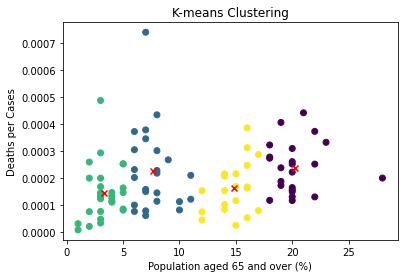

In [160]:
cluster(stats1,col1,col2,4)

C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

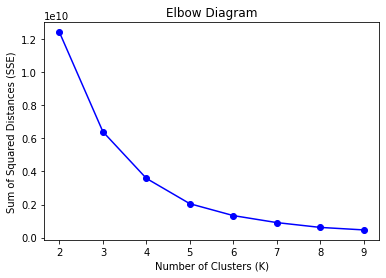

In [161]:
col1 = stats1['GDP/Capita']
col2 = stats1['Tests per population']
elbowPlot(col1,col2)


C:\Users\kyriakstrat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Entity
Albania           0
Argentina         0
Australia         1
Austria           1
Bahrain           0
                 ..
United Kingdom    1
United States     1
Uruguay           0
Zambia            0
Zimbabwe          0
Name: cluster, Length: 95, dtype: int32


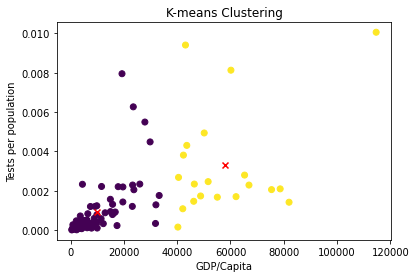

In [162]:
cluster(stats1,col1,col2,2)

Epoch 1/10
32/32 [==============================] - 3s 5ms/step - loss: 1.0856
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 1.0270
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0288
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 1.0272
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 1.0128
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 1.0202
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 0.9972
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0015
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 0.9878
Epoch 10/10
4/4 [==============================] - 0s 4ms/step


InvalidArgumentError: {{function_node __wrapped__Sub_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [100,1] vs. [100,10,1] [Op:Sub]